In [1]:
from keras import layers
from keras.models import Model
import numpy as np

In [2]:
from keras.datasets import mnist

# Download dataset
#(x_train, _), (x_test, _) = mnist.load_data()
# Path is relative to /.keras/datasets
(x_train, _), (x_test, _) = mnist.load_data(path='mnist.npz')

# normalize all values between 0-1 and we will flatten the images into vectors
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))
print(x_train.shape)
print(x_test.shape)

11490434/11490434 [==============================] - 1s 0us/step
(60000, 784)
(10000, 784)


In [3]:
# Create Layers + Model

# this is the size of our encoded representations
# 32 floats -> compression of factor 24.5, assuming the input is 784 floats
encoding_dim = 32

# this is our input placeholder
input_img = layers.Input(shape=(784,))

# "encoded" is the encoded representation of the input
encoded = layers.Dense(encoding_dim, activation='relu')(input_img)
# "decoded" is the lossy reconstruction of the input
decoded = layers.Dense(784, activation='sigmoid')(encoded)

# this model maps an input to its reconstruction
autoencoder_Model = Model(input_img, decoded)

# this model maps an input to its encoded representation
encoder_Model = Model(input_img, encoded)

# create a placeholder for an encoded (32-dimensional) input
encoded_input = layers.Input(shape=(encoding_dim,))
# retrieve the last layer of the autoencoder model
decoder_layer = autoencoder_Model.layers[-1]

# create the decoder model
decoder_Model = Model(encoded_input, decoder_layer(encoded_input))

autoencoder_Model.compile(optimizer='adam', loss='binary_crossentropy')


In [ ]:
#  train our autoencoder

n_epochs = 100
autoencoder_Model.fit(x_train, x_train,
                epochs=n_epochs,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

#==============================================================================

Epoch 1/100
235/235 [==============================] - 3s 12ms/step - loss: 0.2774 - val_loss: 0.1904
Epoch 2/100
235/235 [==============================] - 3s 11ms/step - loss: 0.1710 - val_loss: 0.1525
Epoch 3/100
235/235 [==============================] - 3s 11ms/step - loss: 0.1432 - val_loss: 0.1328
Epoch 4/100
235/235 [==============================] - 3s 14ms/step - loss: 0.1274 - val_loss: 0.1201
Epoch 5/100
235/235 [==============================] - 3s 12ms/step - loss: 0.1171 - val_loss: 0.1119
Epoch 6/100
235/235 [==============================] - 3s 11ms/step - loss: 0.1102 - val_loss: 0.1063
Epoch 7/100
235/235 [==============================] - 3s 11ms/step - loss: 0.1054 - val_loss: 0.1023
Epoch 8/100
235/235 [==============================] - 3s 11ms/step - loss: 0.1018 - val_loss: 0.0992
Epoch 9/100
235/235 [==============================] - 4s 16ms/step - loss: 0.0993 - val_loss: 0.0972
Epoch 10/100
235/235 [==============================] - 3s 11ms/step - loss: 0.097

313/313 [==============================] - 0s 1ms/step


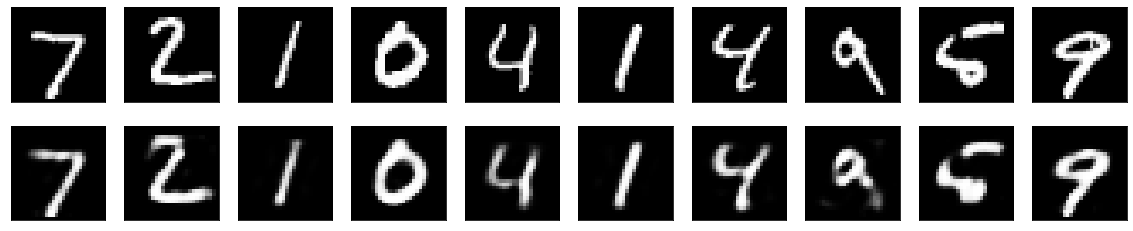

In [ ]:
# encode and decode some digits

# note that we take them from the *test* set
encoded_imgs = encoder_Model.predict(x_test)
decoded_imgs = decoder_Model.predict(encoded_imgs)

# use Matplotlib
import matplotlib.pyplot as plt

n = 10  # how many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()